In [116]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Reading CSV file
mat = pd.read_csv('C:\Data\Hilary Files\Year 3\OMIS 30\student-mat.csv')
por = pd.read_csv('C:\Data\Hilary Files\Year 3\OMIS 30\student-por.csv')

In [ ]:
# Assign math class to 1 and Portuguese class to 0 
mat['class'] = 1 
por['class'] = 0

In [4]:
# Combine two datasets 
combine_df = mat.append(por, ignore_index = True)
combine_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [5]:
#Shows that datasets have been combined
combine_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,0
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,0


## Finding X

Many research have shown that boys are stronger at logical thinking, meaning that they outperform girls in STEM related classes, while girls would exhibit better reading and writing skills. Hence, I hypothesize that boys perform better in Math class while girls perform better in the Portuguese class.

In [6]:
#Assign integer value for each gender, since some plots do not take in strings
# Assign Female to 1, Male to 0
def gender(sex):
    if sex == 'F':
        return 1
    else:
        return 0 
combine_df['gender'] = combine_df['sex'].apply(gender)

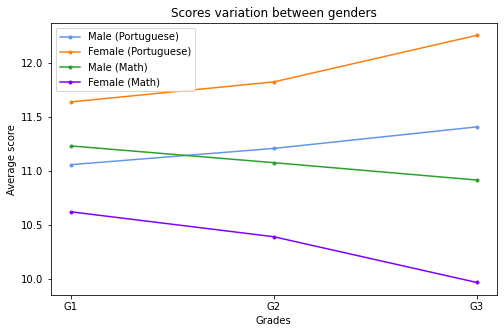

In [135]:
# Used a line graph to show the trend of average scores between male and female students

# Set the size of the graph
plt.figure(figsize = (8,5))

# Filtered the combine_df for records looking male and female 
# from both Portuguese Class and Math Class separately
male_por = combine_df[(combine_df['gender'] == 0) & (combine_df['class'] == 0)] 
fmale_por = combine_df[(combine_df['gender'] == 1) & (combine_df['class'] == 0)]
male_mat = combine_df[(combine_df['gender'] == 0) & (combine_df['class'] == 1)]
fmale_mat = combine_df[(combine_df['gender'] == 1) & (combine_df['class'] == 1)]

m_por = []
f_por = []
m_mat = []
f_mat = []
x = ['G1','G2','G3']

# Appended the average score of gender per class into respective lists
for xs in x:
    m_por.append(np.mean(male_por[xs]))
    f_por.append(np.mean(fmale_por[xs]))
    m_mat.append(np.mean(male_mat[xs]))
    f_mat.append(np.mean(fmale_mat[xs]))

# Plotting the graph 
plt.plot(x,x1,'.-',Color = '#6495ED',label='Male (Portuguese)')
plt.legend()
plt.plot(x,x2,'.-',label='Female (Portuguese)')
plt.legend()
plt.plot(x,x3,'.-',label='Male (Math)')
plt.legend()
plt.plot(x,x4,'.-', Color='#7F00FF',label='Female (Math)')
plt.legend()
plt.title('Scores variation between genders')
plt.xlabel('Grades')
plt.ylabel('Average score')

plt.show()
#adapted code from: https://www.kaggle.com/sagnik1511/correlation-of-features-advanced-visualization?select=student-mat.csv

The graph supports our hypothesis that male generaglly perform better in logical thinking than females, while female perform better in literature. It is proved by in our graph where female in Portuguese class (denoted by orange line) has a higher average score their counterparts (denoted by blue line). While male in Math class (denoted by green line) outperforms female in the same class by at least one mark on average.

## Finding X

I observed that the next generation of well-known alumni of Ivy League school are able to perform well in school and/or attain a high level of success in their field of work. Which led me to want to find out whether this relationship is true. If so, does it start from a young age. 
Note: Assuming all else equal (e.g. legacy).

Medu - Mother's education (Numeric: 0: None, 1: Primary education (4th grade), 2: 5th to 9th grade, 3 : secondary education or 4: Higher education)
Fedu - Father's education (Numeric: 0: None, 1: Primary education (4th grade), 2: 5th to 9th grade, 3 : secondary education or 4: Higher education)

In [90]:
# Add up the total of level of education from both parents
combine_df['famedu_mat'] = combine_df['fedu_mat'] + combine_df['medu_mat']

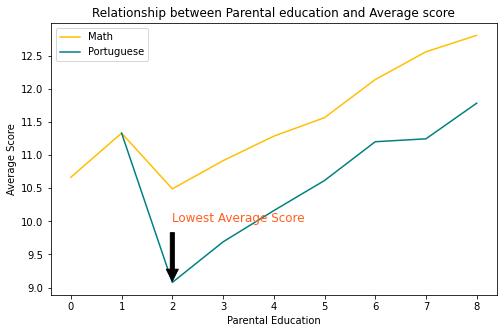

In [134]:
#Relationship between Student's Parent's Education Level and Student's Performance

# Set the size of the graph
plt.figure(figsize = (8,5))

for variable in x:
    mat = []
    por = []
    
    for i in range(9):
        # Filtered the combine_df for family education records AND class = 0
        fam_por = combine_df[(combine_df['famedu']==i) & (combine_df['class']==0)]
        # Filtered the combine_df for family education records AND class = 1 
        fam_mat = combine_df[(combine_df['famedu']==i) & (combine_df['class']==1)]

        # Assign 'G_Average' as the average of all the grades combined
        combine_df['G_Average'] = combine_df[['G1','G2','G3']].values.mean(axis=1)
        # Looked at the family education in each class by the 'G_Average' column and append to empty list
        mat.append(np.mean(fam_por['G_Average']))
        por.append(np.mean(fam_mat['G_Average']))
        
# Plotting Parental Education per Average Score        
plt.plot(mat,'#FFBF00', label = 'Math')
plt.legend()
plt.plot(por,'#008080', label = 'Portuguese')
# Arrow pointing towards the lowest grade
plt.annotate('Lowest Average Score', xy = (2,9), xytext = (2,10), color = '#FF5F1F', 
             fontsize = 12, arrowprops = dict(facecolor = 'black', shrink = 0.1))
plt.legend()
plt.title('Relationship between Parental education and Average score')
plt.xlabel('Parental Education')
plt.ylabel('Average Score')
plt.show()
#adapted code from: https://www.kaggle.com/sagnik1511/correlation-of-features-advanced-visualization?select=student-mat.csv

This graph shows that there is a positive relationship between the average score of secondary school student and their parent's education level, meaning that children of more educated parents tend to perform better at school. Probably due to better resources that they can provide their children to excel at school.
Interestingly, students with parents either parent having some degree of education, performs the worst out of all the other education levels.
What is worth noting is that eventhough students perform better with better educated parents, the average score peaks at 12.5, with 20 being the maximum grade, which is only 62.5%. 